## Environment setup

This is a view on the github-stored notebook. clone it first and navigate to a subfolder in orde to access the data files


In [26]:
#! git clone https://github.com/slaninam/Loc1D.git

/content/Loc1D


## Data preprocessing

All input files are read into a single pandas DataFrame.
The naming convention is maintained, one additional column 'dist' is added to record the actual distance at which the measurement was taken.

The complete preprocessed data is available in the DataFrame **df**


In [0]:
import pandas as pd
import numpy as np

dists = np.arange(0, 35.5, 0.5)
dfs = []
for dist in dists:
    if dist.is_integer():
        fname = 'dist.' + '{0:.0f}'.format(dist) + 'm.txt'
    else:
        fname = 'dist.' + '{0:.1f}'.format(dist) + 'm.txt'
    
    df = pd.read_csv(fname, header = None, names=['time','tag id','anchor id','anchor1 id', 'anchor2 id', 'anchor3 id','a0ch0','a0ch1','a0ch2','a0ch3','a0rssi0','a0rssi1','a0rssi2','a0rssi3','a1ch0','a1ch1','a1ch2','a1ch3','a1rssi0','a1rssi1','a1rssi2','a1rssi3','a2ch0','a2ch1','a2ch2','a2ch3','a2rssi0','a2rssi1','a2rssi2','a2rssi3','a3ch0','a3ch1','a3ch2','a3ch3','a3rssi0','a3rssi1','a3rssi2','a3rssi3'])
    df['dist'] = dist
    dfs.append(df)

df = pd.concat(dfs)

## Train and test set creation
The data is randomly divided in the train and test sets and the target values are put in separate vectors. 

Potentially leaky variables removed:
* 'time'

Othev variables removed as they contain no value:
* 'tag id'
* 'anchor id'
* 'anchor1 id'
* 'anchor2 id'
* 'anchor3 id'

In [0]:
from sklearn.model_selection import train_test_split

df = df.drop(axis=1,labels = ['time'])
df = df.drop(axis=1,labels = ['tag id','anchor id','anchor1 id','anchor2 id','anchor3 id'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(axis=1,labels = ['dist']), df['dist'], test_size=0.3, random_state=0)


# Models

## ANN
* Multi-Layer Perceptron
* Totally random structure (first guess)
* Output F2-score 0.91 (=not bad)

In [0]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(40, 30), random_state=0)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9541284673109309

Plotting the predicted distances vs real distances:

<IPython.core.display.Javascript object>


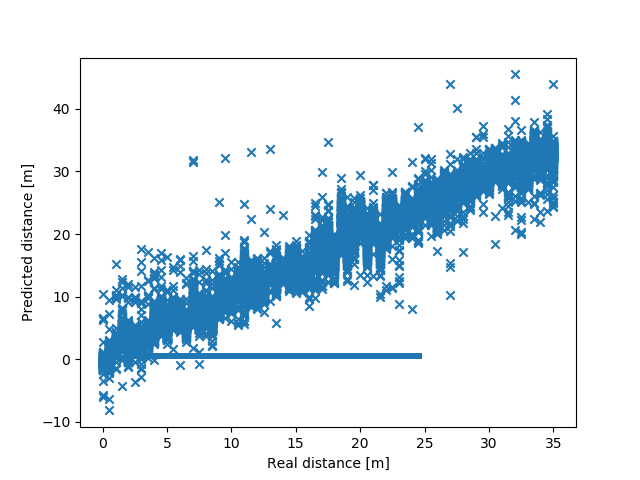

In [0]:
import matplotlib.pyplot as plt
%matplotlib notebook

x = y_test
y = clf.predict(X_test)

_=plt.scatter(x,y,marker='x')
_=plt.xlabel('Real distance [m]')
_=plt.ylabel('Predicted distance [m]')

## Classifier performance metrics

In [0]:
err = y-x
err.describe()

count    15091.000000
mean        -0.064623
std          2.168913
min        -16.776392
25%         -1.234233
50%         -0.113241
75%          1.075688
max         24.771614
Name: dist, dtype: float64

In [0]:
srterr = sorted(abs(err))

In [0]:
srterr[13580]

3.223269484523448

In [0]:
_=plt.hist(srterr, bins=1000, cumulative=True, density=True)

In [0]:
X_train.head()

,a0ch0,a0ch1,a0ch2,a0ch3,a0rssi0,a0rssi1,a0rssi2,a0rssi3,a1ch0,a1ch1,...,a2rssi2,a2rssi3,a3ch0,a3ch1,a3ch2,a3ch3,a3rssi0,a3rssi1,a3rssi2,a3rssi3
116,2,1,0,1,-62,-70,-60,-70,2,2,...,-42,-44,0,1,2,0,-70,-79,-70,-70
104,2,1,0,1,-62,-63,-62,-61,0,2,...,-46,-44,0,1,2,0,-61,-62,-60,-70
641,2,1,0,1,-63,-62,-62,-62,0,2,...,-40,-62,0,1,2,0,-71,-71,-61,-70
291,2,1,2,0,-50,-61,-61,-55,1,1,...,-51,-61,2,1,1,1,-61,-61,-61,-62
171,0,2,1,2,-59,-61,-55,-54,0,0,...,-61,-61,1,2,0,0,-61,-70,-58,-81
